Создать сложную функцию с несколькими переменными. Сгенерировать 200 значений.<br>
Задача соседа создать нейронку(сапроксимировать функцию по данным), предсказывающую по 10 значениям 11 значение функции .<br>
Функция активатор для выходного слоя<br> 
Метрика mape

$y = {\sqrt{sin({rand(0,1)})+xcos({ln(x)})^{1/32}}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import math
import random
import tensorflow as tf
from tensorflow import keras 
from sklearn import preprocessing, model_selection

2023-04-03 02:46:11.681615: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def PrettyPlot(model, x,y):
    preds = model.predict(x)
    plt.clf()
    plt.plot(x, preds, '.', c= 'b', label = 'Preds')
    plt.plot(x, y, '.', c = 'r', 
             alpha = 0.6,
             label = 'Ground truth')

In [3]:
#y = (math.sin(np.random.random()) + x*(math.cos(math.log(x)))**1/32)**1/2 # complicated function
out = [] #array of out values
input_values = []
#input_values = random.sample(range(1,1000),200)


In [4]:
i = 0
while i <= 199:    
    x = random.uniform(1, 250)
    input_values.append(x)
    y = (math.sin(random.random()) + x*(math.cos(math.log(x)))**1/32)**1/2
    out.append(y)
    i += 1
#plt.plot(input_values, out, linestyle = '' ,marker = '.')

In [5]:
x = np.array(input_values)
x.shape = (len(x), 1)
print(x)
y = np.array(out)
y.shape = (len(y), 1)

[[133.42077362]
 [ 76.62155561]
 [188.36170275]
 [186.5880463 ]
 [101.60045719]
 [ 83.83642827]
 [145.04401884]
 [195.80071559]
 [ 15.03483346]
 [ 86.59445654]
 [216.18933054]
 [125.85583395]
 [ 23.07070185]
 [ 33.62487618]
 [ 39.75857036]
 [ 97.69228242]
 [ 52.32054947]
 [108.33320785]
 [ 48.08981105]
 [170.08704498]
 [ 52.18432629]
 [ 20.94387642]
 [243.42697392]
 [211.52694467]
 [230.54767162]
 [ 17.93086709]
 [245.70758007]
 [ 90.71474307]
 [174.424241  ]
 [142.85291045]
 [247.79996928]
 [245.34806372]
 [142.8065323 ]
 [112.57775041]
 [179.03090242]
 [ 57.97507857]
 [ 12.39346884]
 [150.0517282 ]
 [130.99788593]
 [194.67379994]
 [186.11248974]
 [121.62078014]
 [ 16.05019721]
 [ 46.39978628]
 [ 70.09018992]
 [ 98.42651261]
 [113.4229593 ]
 [143.40527818]
 [  8.39256893]
 [148.3676748 ]
 [182.93686372]
 [ 27.14522257]
 [107.20720787]
 [ 51.95246384]
 [112.92538718]
 [ 22.29887385]
 [191.64671739]
 [152.93081151]
 [ 57.29496731]
 [ 39.38363382]
 [168.32739533]
 [ 89.98422372]
 [246.29

In [6]:
#print(y)

In [7]:
df = pd.DataFrame(x,columns = ['x'])
df.dropna()
df.insert(1,"y", y)
df = df.sort_values(by = ['x'])
x = np.array(df['x'])
y = np.array(df['y'])
df.dropna()

,x,y
184,5.327372,0.243226
48,8.392569,0.290381
178,8.978894,0.107117
179,9.325890,0.329439
36,12.393469,0.120958
...,...,...
30,247.799969,2.818870
77,248.671217,2.873140
104,249.563649,3.225926
143,249.579953,3.214382


In [8]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,train_size = 0.9)

In [9]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(10,activation = 'sigmoid', input_dim = 1,kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10,activation = 'sigmoid',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10,activation = 'sigmoid',kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(1,kernel_initializer='he_uniform'))

model.compile(loss = 'mse', 
               optimizer = 'adam',
              metrics = ['mse', 'mae', 'mape'])

model.fit(x_train, y_train, batch_size=10,epochs = 2000)

Epoch 1/2000


2023-04-03 02:46:14.615769: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


18/18 [==============================] - 0s 651us/step - loss: 1.2654 - mse: 1.2654 - mae: 1.0019 - mape: 700.0268
Epoch 2/2000
18/18 [==============================] - 0s 762us/step - loss: 1.2037 - mse: 1.2037 - mae: 0.9696 - mape: 614.0671
Epoch 3/2000
18/18 [==============================] - 0s 696us/step - loss: 1.1747 - mse: 1.1747 - mae: 0.9542 - mape: 566.9592
Epoch 4/2000
18/18 [==============================] - 0s 734us/step - loss: 1.1686 - mse: 1.1686 - mae: 0.9484 - mape: 548.2050
Epoch 5/2000
18/18 [==============================] - 0s 713us/step - loss: 1.1695 - mse: 1.1695 - mae: 0.9437 - mape: 523.9192
Epoch 6/2000
18/18 [==============================] - 0s 719us/step - loss: 1.1667 - mse: 1.1667 - mae: 0.9414 - mape: 518.4659
Epoch 7/2000
18/18 [==============================] - 0s 683us/step - loss: 1.1669 - mse: 1.1669 - mae: 0.9429 - mape: 523.9748
Epoch 8/2000
18/18 [==============================] - 0s 655us/step - loss: 1.1671 - mse: 1.1671 - mae: 0.9426 - mape

18/18 [==============================] - 0s 637us/step - loss: 0.1011 - mse: 0.1011 - mae: 0.2455 - mape: 149.1199
Epoch 65/2000
18/18 [==============================] - 0s 599us/step - loss: 0.1006 - mse: 0.1006 - mae: 0.2483 - mape: 148.0608
Epoch 66/2000
18/18 [==============================] - 0s 622us/step - loss: 0.0902 - mse: 0.0902 - mae: 0.2309 - mape: 140.9928
Epoch 67/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0866 - mse: 0.0866 - mae: 0.2297 - mape: 144.0975
Epoch 68/2000
18/18 [==============================] - 0s 607us/step - loss: 0.0814 - mse: 0.0814 - mae: 0.2174 - mape: 139.5845
Epoch 69/2000
18/18 [==============================] - 0s 676us/step - loss: 0.0840 - mse: 0.0840 - mae: 0.2287 - mape: 138.4343
Epoch 70/2000
18/18 [==============================] - 0s 648us/step - loss: 0.0765 - mse: 0.0765 - mae: 0.2133 - mape: 141.3564
Epoch 71/2000
18/18 [==============================] - 0s 632us/step - loss: 0.0748 - mse: 0.0748 - mae: 0.2101

18/18 [==============================] - 0s 626us/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1491 - mape: 81.8663
Epoch 128/2000
18/18 [==============================] - 0s 605us/step - loss: 0.0346 - mse: 0.0346 - mae: 0.1552 - mape: 81.3337
Epoch 129/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0323 - mse: 0.0323 - mae: 0.1504 - mape: 83.2320
Epoch 130/2000
18/18 [==============================] - 0s 672us/step - loss: 0.0260 - mse: 0.0260 - mae: 0.1363 - mape: 77.9155
Epoch 131/2000
18/18 [==============================] - 0s 650us/step - loss: 0.0282 - mse: 0.0282 - mae: 0.1425 - mape: 76.9235
Epoch 132/2000
18/18 [==============================] - 0s 637us/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1473 - mape: 83.8583
Epoch 133/2000
18/18 [==============================] - 0s 625us/step - loss: 0.0290 - mse: 0.0290 - mae: 0.1431 - mape: 81.6618
Epoch 134/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0321 - mse: 0.0321 - mae: 0.1488

18/18 [==============================] - 0s 650us/step - loss: 0.0388 - mse: 0.0388 - mae: 0.1641 - mape: 68.6730
Epoch 191/2000
18/18 [==============================] - 0s 618us/step - loss: 0.0390 - mse: 0.0390 - mae: 0.1615 - mape: 67.1316
Epoch 192/2000
18/18 [==============================] - 0s 684us/step - loss: 0.0328 - mse: 0.0328 - mae: 0.1554 - mape: 70.5587
Epoch 193/2000
18/18 [==============================] - 0s 647us/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1258 - mape: 65.4834
Epoch 194/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1283 - mape: 65.2534
Epoch 195/2000
18/18 [==============================] - 0s 654us/step - loss: 0.0220 - mse: 0.0220 - mae: 0.1270 - mape: 64.4959
Epoch 196/2000
18/18 [==============================] - 0s 638us/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1354 - mape: 67.2104
Epoch 197/2000
18/18 [==============================] - 0s 660us/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1299

18/18 [==============================] - 0s 676us/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1313 - mape: 64.5950
Epoch 254/2000
18/18 [==============================] - 0s 664us/step - loss: 0.0237 - mse: 0.0237 - mae: 0.1272 - mape: 64.2013
Epoch 255/2000
18/18 [==============================] - 0s 668us/step - loss: 0.0225 - mse: 0.0225 - mae: 0.1271 - mape: 62.5455
Epoch 256/2000
18/18 [==============================] - 0s 669us/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1269 - mape: 64.6054
Epoch 257/2000
18/18 [==============================] - 0s 664us/step - loss: 0.0283 - mse: 0.0283 - mae: 0.1396 - mape: 66.2816
Epoch 258/2000
18/18 [==============================] - 0s 657us/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1320 - mape: 68.9717
Epoch 259/2000
18/18 [==============================] - 0s 615us/step - loss: 0.0268 - mse: 0.0268 - mae: 0.1368 - mape: 68.1452
Epoch 260/2000
18/18 [==============================] - 0s 610us/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1320

18/18 [==============================] - 0s 683us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1250 - mape: 63.1323
Epoch 317/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0262 - mse: 0.0262 - mae: 0.1331 - mape: 62.2409
Epoch 318/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1262 - mape: 62.0036
Epoch 319/2000
18/18 [==============================] - 0s 623us/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1326 - mape: 66.6560
Epoch 320/2000
18/18 [==============================] - 0s 622us/step - loss: 0.0311 - mse: 0.0311 - mae: 0.1455 - mape: 73.2919
Epoch 321/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1566 - mape: 66.2301
Epoch 322/2000
18/18 [==============================] - 0s 639us/step - loss: 0.0275 - mse: 0.0275 - mae: 0.1374 - mape: 71.7065
Epoch 323/2000
18/18 [==============================] - 0s 607us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1239

18/18 [==============================] - 0s 598us/step - loss: 0.0258 - mse: 0.0258 - mae: 0.1350 - mape: 64.6259
Epoch 380/2000
18/18 [==============================] - 0s 608us/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1272 - mape: 66.2013
Epoch 381/2000
18/18 [==============================] - 0s 641us/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1275 - mape: 63.8202
Epoch 382/2000
18/18 [==============================] - 0s 604us/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1326 - mape: 65.8152
Epoch 383/2000
18/18 [==============================] - 0s 622us/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1224 - mape: 65.5227
Epoch 384/2000
18/18 [==============================] - 0s 613us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1240 - mape: 66.5675
Epoch 385/2000
18/18 [==============================] - 0s 610us/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1276 - mape: 61.5475
Epoch 386/2000
18/18 [==============================] - 0s 611us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1245

18/18 [==============================] - 0s 614us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1229 - mape: 65.2725
Epoch 443/2000
18/18 [==============================] - 0s 610us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1214 - mape: 62.6270
Epoch 444/2000
18/18 [==============================] - 0s 640us/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1218 - mape: 63.3315
Epoch 445/2000
18/18 [==============================] - 0s 617us/step - loss: 0.0223 - mse: 0.0223 - mae: 0.1253 - mape: 66.4690
Epoch 446/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1223 - mape: 59.8049
Epoch 447/2000
18/18 [==============================] - 0s 634us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1232 - mape: 64.9895
Epoch 448/2000
18/18 [==============================] - 0s 621us/step - loss: 0.0196 - mse: 0.0196 - mae: 0.1188 - mape: 62.4811
Epoch 449/2000
18/18 [==============================] - 0s 623us/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1330

18/18 [==============================] - 0s 626us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1208 - mape: 65.8966
Epoch 506/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1247 - mape: 65.0737
Epoch 507/2000
18/18 [==============================] - 0s 651us/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1218 - mape: 68.7619
Epoch 508/2000
18/18 [==============================] - 0s 616us/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1250 - mape: 62.2680
Epoch 509/2000
18/18 [==============================] - 0s 604us/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1259 - mape: 60.9639
Epoch 510/2000
18/18 [==============================] - 0s 625us/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1298 - mape: 63.5274
Epoch 511/2000
18/18 [==============================] - 0s 623us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1201 - mape: 66.0988
Epoch 512/2000
18/18 [==============================] - 0s 621us/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1269

18/18 [==============================] - 0s 644us/step - loss: 0.0259 - mse: 0.0259 - mae: 0.1355 - mape: 67.8195
Epoch 569/2000
18/18 [==============================] - 0s 632us/step - loss: 0.0259 - mse: 0.0259 - mae: 0.1362 - mape: 67.8828
Epoch 570/2000
18/18 [==============================] - 0s 601us/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1520 - mape: 63.2604
Epoch 571/2000
18/18 [==============================] - 0s 635us/step - loss: 0.0262 - mse: 0.0262 - mae: 0.1367 - mape: 63.8660
Epoch 572/2000
18/18 [==============================] - 0s 613us/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1210 - mape: 63.2372
Epoch 573/2000
18/18 [==============================] - 0s 608us/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1253 - mape: 63.7374
Epoch 574/2000
18/18 [==============================] - 0s 638us/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1254 - mape: 66.2696
Epoch 575/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1220

18/18 [==============================] - 0s 777us/step - loss: 0.0240 - mse: 0.0240 - mae: 0.1328 - mape: 67.7077
Epoch 632/2000
18/18 [==============================] - 0s 709us/step - loss: 0.0206 - mse: 0.0206 - mae: 0.1226 - mape: 61.8642
Epoch 633/2000
18/18 [==============================] - 0s 618us/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1205 - mape: 60.8716
Epoch 634/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0191 - mse: 0.0191 - mae: 0.1188 - mape: 62.4828
Epoch 635/2000
18/18 [==============================] - 0s 613us/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1194 - mape: 62.5540
Epoch 636/2000
18/18 [==============================] - 0s 613us/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1236 - mape: 63.8617
Epoch 637/2000
18/18 [==============================] - 0s 621us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1219 - mape: 64.3439
Epoch 638/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0214 - mse: 0.0214 - mae: 0.1234

18/18 [==============================] - 0s 612us/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1202 - mape: 62.8316
Epoch 695/2000
18/18 [==============================] - 0s 641us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1217 - mape: 61.0524
Epoch 696/2000
18/18 [==============================] - 0s 662us/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1216 - mape: 63.4471
Epoch 697/2000
18/18 [==============================] - 0s 611us/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1315 - mape: 62.5972
Epoch 698/2000
18/18 [==============================] - 0s 632us/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1457 - mape: 61.4013
Epoch 699/2000
18/18 [==============================] - 0s 617us/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1330 - mape: 69.7254
Epoch 700/2000
18/18 [==============================] - 0s 606us/step - loss: 0.0218 - mse: 0.0218 - mae: 0.1246 - mape: 66.7543
Epoch 701/2000
18/18 [==============================] - 0s 598us/step - loss: 0.0233 - mse: 0.0233 - mae: 0.1270

18/18 [==============================] - 0s 615us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1220 - mape: 64.2297
Epoch 758/2000
18/18 [==============================] - 0s 615us/step - loss: 0.0206 - mse: 0.0206 - mae: 0.1228 - mape: 63.3059
Epoch 759/2000
18/18 [==============================] - 0s 626us/step - loss: 0.0188 - mse: 0.0188 - mae: 0.1170 - mape: 63.8414
Epoch 760/2000
18/18 [==============================] - 0s 621us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1223 - mape: 62.0772
Epoch 761/2000
18/18 [==============================] - 0s 640us/step - loss: 0.0205 - mse: 0.0205 - mae: 0.1229 - mape: 64.7497
Epoch 762/2000
18/18 [==============================] - 0s 609us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1207 - mape: 62.1907
Epoch 763/2000
18/18 [==============================] - 0s 609us/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1250 - mape: 65.6474
Epoch 764/2000
18/18 [==============================] - 0s 622us/step - loss: 0.0289 - mse: 0.0289 - mae: 0.1447

18/18 [==============================] - 0s 625us/step - loss: 0.0191 - mse: 0.0191 - mae: 0.1182 - mape: 68.3783
Epoch 821/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0235 - mse: 0.0235 - mae: 0.1313 - mape: 64.2604
Epoch 822/2000
18/18 [==============================] - 0s 619us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1231 - mape: 67.9305
Epoch 823/2000
18/18 [==============================] - 0s 627us/step - loss: 0.0233 - mse: 0.0233 - mae: 0.1297 - mape: 64.5315
Epoch 824/2000
18/18 [==============================] - 0s 627us/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1200 - mape: 64.3685
Epoch 825/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0196 - mse: 0.0196 - mae: 0.1200 - mape: 68.6450
Epoch 826/2000
18/18 [==============================] - 0s 610us/step - loss: 0.0206 - mse: 0.0206 - mae: 0.1222 - mape: 65.5351
Epoch 827/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0196 - mse: 0.0196 - mae: 0.1203

18/18 [==============================] - 0s 597us/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1200 - mape: 64.1752
Epoch 884/2000
18/18 [==============================] - 0s 609us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1217 - mape: 61.9429
Epoch 885/2000
18/18 [==============================] - 0s 619us/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1315 - mape: 64.0414
Epoch 886/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0257 - mse: 0.0257 - mae: 0.1318 - mape: 63.8387
Epoch 887/2000
18/18 [==============================] - 0s 633us/step - loss: 0.0264 - mse: 0.0264 - mae: 0.1352 - mape: 70.7198
Epoch 888/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1320 - mape: 67.7751
Epoch 889/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1265 - mape: 65.7097
Epoch 890/2000
18/18 [==============================] - 0s 590us/step - loss: 0.0232 - mse: 0.0232 - mae: 0.1249

18/18 [==============================] - 0s 633us/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1253 - mape: 62.1092
Epoch 947/2000
18/18 [==============================] - 0s 605us/step - loss: 0.0220 - mse: 0.0220 - mae: 0.1231 - mape: 63.2897
Epoch 948/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1260 - mape: 71.1640
Epoch 949/2000
18/18 [==============================] - 0s 606us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1211 - mape: 63.0083
Epoch 950/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1207 - mape: 67.9865
Epoch 951/2000
18/18 [==============================] - 0s 626us/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1288 - mape: 66.7061
Epoch 952/2000
18/18 [==============================] - 0s 621us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1221 - mape: 66.7106
Epoch 953/2000
18/18 [==============================] - 0s 596us/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1200

18/18 [==============================] - 0s 597us/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1266 - mape: 62.9186
Epoch 1010/2000
18/18 [==============================] - 0s 593us/step - loss: 0.0213 - mse: 0.0213 - mae: 0.1255 - mape: 63.0829
Epoch 1011/2000
18/18 [==============================] - 0s 607us/step - loss: 0.0257 - mse: 0.0257 - mae: 0.1314 - mape: 64.9588
Epoch 1012/2000
18/18 [==============================] - 0s 622us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1206 - mape: 65.1417
Epoch 1013/2000
18/18 [==============================] - 0s 603us/step - loss: 0.0191 - mse: 0.0191 - mae: 0.1195 - mape: 64.3396
Epoch 1014/2000
18/18 [==============================] - 0s 649us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1217 - mape: 63.4351
Epoch 1015/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0228 - mse: 0.0228 - mae: 0.1250 - mape: 68.3103
Epoch 1016/2000
18/18 [==============================] - 0s 653us/step - loss: 0.0232 - mse: 0.0232 - mae:

18/18 [==============================] - 0s 620us/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1174 - mape: 64.7149
Epoch 1073/2000
18/18 [==============================] - 0s 626us/step - loss: 0.0205 - mse: 0.0205 - mae: 0.1236 - mape: 67.0557
Epoch 1074/2000
18/18 [==============================] - 0s 637us/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1236 - mape: 64.2189
Epoch 1075/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1243 - mape: 63.2384
Epoch 1076/2000
18/18 [==============================] - 0s 603us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1219 - mape: 65.8328
Epoch 1077/2000
18/18 [==============================] - 0s 597us/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1201 - mape: 64.6861
Epoch 1078/2000
18/18 [==============================] - 0s 637us/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1197 - mape: 64.6735
Epoch 1079/2000
18/18 [==============================] - 0s 629us/step - loss: 0.0208 - mse: 0.0208 - mae:

18/18 [==============================] - 0s 610us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1211 - mape: 64.2050
Epoch 1136/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1207 - mape: 62.2333
Epoch 1137/2000
18/18 [==============================] - 0s 629us/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1246 - mape: 69.8307
Epoch 1138/2000
18/18 [==============================] - 0s 619us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1202 - mape: 63.7781
Epoch 1139/2000
18/18 [==============================] - 0s 619us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1242 - mape: 66.2609
Epoch 1140/2000
18/18 [==============================] - 0s 608us/step - loss: 0.0241 - mse: 0.0241 - mae: 0.1294 - mape: 66.4268
Epoch 1141/2000
18/18 [==============================] - 0s 626us/step - loss: 0.0232 - mse: 0.0232 - mae: 0.1266 - mape: 60.0840
Epoch 1142/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0214 - mse: 0.0214 - mae:

18/18 [==============================] - 0s 616us/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1166 - mape: 66.6631
Epoch 1199/2000
18/18 [==============================] - 0s 590us/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1361 - mape: 67.6094
Epoch 1200/2000
18/18 [==============================] - 0s 606us/step - loss: 0.0208 - mse: 0.0208 - mae: 0.1257 - mape: 65.3764
Epoch 1201/2000
18/18 [==============================] - 0s 602us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1222 - mape: 65.9339
Epoch 1202/2000
18/18 [==============================] - 0s 620us/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1279 - mape: 65.2141
Epoch 1203/2000
18/18 [==============================] - 0s 627us/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1329 - mape: 67.3428
Epoch 1204/2000
18/18 [==============================] - 0s 595us/step - loss: 0.0192 - mse: 0.0192 - mae: 0.1175 - mape: 65.0795
Epoch 1205/2000
18/18 [==============================] - 0s 611us/step - loss: 0.0214 - mse: 0.0214 - mae:

18/18 [==============================] - 0s 596us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1226 - mape: 64.9945
Epoch 1262/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1214 - mape: 66.7079
Epoch 1263/2000
18/18 [==============================] - 0s 634us/step - loss: 0.0294 - mse: 0.0294 - mae: 0.1447 - mape: 63.7723
Epoch 1264/2000
18/18 [==============================] - 0s 612us/step - loss: 0.0223 - mse: 0.0223 - mae: 0.1264 - mape: 68.0643
Epoch 1265/2000
18/18 [==============================] - 0s 634us/step - loss: 0.0231 - mse: 0.0231 - mae: 0.1274 - mape: 60.6926
Epoch 1266/2000
18/18 [==============================] - 0s 624us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1205 - mape: 62.2858
Epoch 1267/2000
18/18 [==============================] - 0s 607us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1187 - mape: 68.8371
Epoch 1268/2000
18/18 [==============================] - 0s 602us/step - loss: 0.0234 - mse: 0.0234 - mae:

18/18 [==============================] - 0s 608us/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1199 - mape: 62.6206
Epoch 1325/2000
18/18 [==============================] - 0s 615us/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1220 - mape: 64.1712
Epoch 1326/2000
18/18 [==============================] - 0s 624us/step - loss: 0.0263 - mse: 0.0263 - mae: 0.1313 - mape: 60.6058
Epoch 1327/2000
18/18 [==============================] - 0s 615us/step - loss: 0.0229 - mse: 0.0229 - mae: 0.1267 - mape: 65.4941
Epoch 1328/2000
18/18 [==============================] - 0s 629us/step - loss: 0.0329 - mse: 0.0329 - mae: 0.1466 - mape: 67.2997
Epoch 1329/2000
18/18 [==============================] - 0s 627us/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1302 - mape: 67.7345
Epoch 1330/2000
18/18 [==============================] - 0s 633us/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1361 - mape: 63.3199
Epoch 1331/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0191 - mse: 0.0191 - mae:

18/18 [==============================] - 0s 616us/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1197 - mape: 64.3271
Epoch 1388/2000
18/18 [==============================] - 0s 592us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1233 - mape: 66.5403
Epoch 1389/2000
18/18 [==============================] - 0s 604us/step - loss: 0.0225 - mse: 0.0225 - mae: 0.1272 - mape: 69.3824
Epoch 1390/2000
18/18 [==============================] - 0s 632us/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1321 - mape: 66.6499
Epoch 1391/2000
18/18 [==============================] - 0s 619us/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1267 - mape: 65.4850
Epoch 1392/2000
18/18 [==============================] - 0s 600us/step - loss: 0.0215 - mse: 0.0215 - mae: 0.1253 - mape: 68.2649
Epoch 1393/2000
18/18 [==============================] - 0s 653us/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1404 - mape: 63.9887
Epoch 1394/2000
18/18 [==============================] - 0s 626us/step - loss: 0.0193 - mse: 0.0193 - mae:

18/18 [==============================] - 0s 681us/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1219 - mape: 66.2807
Epoch 1451/2000
18/18 [==============================] - 0s 633us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1202 - mape: 65.8200
Epoch 1452/2000
18/18 [==============================] - 0s 681us/step - loss: 0.0260 - mse: 0.0260 - mae: 0.1371 - mape: 64.9253
Epoch 1453/2000
18/18 [==============================] - 0s 745us/step - loss: 0.0244 - mse: 0.0244 - mae: 0.1305 - mape: 69.0295
Epoch 1454/2000
18/18 [==============================] - 0s 725us/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1202 - mape: 63.4136
Epoch 1455/2000
18/18 [==============================] - 0s 713us/step - loss: 0.0206 - mse: 0.0206 - mae: 0.1210 - mape: 67.5627
Epoch 1456/2000
18/18 [==============================] - 0s 718us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1193 - mape: 64.4558
Epoch 1457/2000
18/18 [==============================] - 0s 693us/step - loss: 0.0199 - mse: 0.0199 - mae:

18/18 [==============================] - 0s 603us/step - loss: 0.0226 - mse: 0.0226 - mae: 0.1241 - mape: 61.0718
Epoch 1514/2000
18/18 [==============================] - 0s 610us/step - loss: 0.0205 - mse: 0.0205 - mae: 0.1204 - mape: 62.4776
Epoch 1515/2000
18/18 [==============================] - 0s 622us/step - loss: 0.0211 - mse: 0.0211 - mae: 0.1245 - mape: 66.0388
Epoch 1516/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0245 - mse: 0.0245 - mae: 0.1330 - mape: 66.5175
Epoch 1517/2000
18/18 [==============================] - 0s 624us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1226 - mape: 64.4650
Epoch 1518/2000
18/18 [==============================] - 0s 615us/step - loss: 0.0186 - mse: 0.0186 - mae: 0.1165 - mape: 63.1111
Epoch 1519/2000
18/18 [==============================] - 0s 597us/step - loss: 0.0205 - mse: 0.0205 - mae: 0.1243 - mape: 62.7888
Epoch 1520/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0187 - mse: 0.0187 - mae:

18/18 [==============================] - 0s 603us/step - loss: 0.0219 - mse: 0.0219 - mae: 0.1268 - mape: 67.0587
Epoch 1577/2000
18/18 [==============================] - 0s 623us/step - loss: 0.0236 - mse: 0.0236 - mae: 0.1287 - mape: 67.6010
Epoch 1578/2000
18/18 [==============================] - 0s 638us/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1244 - mape: 62.3755
Epoch 1579/2000
18/18 [==============================] - 0s 669us/step - loss: 0.0196 - mse: 0.0196 - mae: 0.1189 - mape: 65.3828
Epoch 1580/2000
18/18 [==============================] - 0s 635us/step - loss: 0.0257 - mse: 0.0257 - mae: 0.1329 - mape: 63.0227
Epoch 1581/2000
18/18 [==============================] - 0s 613us/step - loss: 0.0255 - mse: 0.0255 - mae: 0.1348 - mape: 67.8152
Epoch 1582/2000
18/18 [==============================] - 0s 615us/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1202 - mape: 67.2432
Epoch 1583/2000
18/18 [==============================] - 0s 610us/step - loss: 0.0204 - mse: 0.0204 - mae:

18/18 [==============================] - 0s 606us/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1199 - mape: 66.3526
Epoch 1640/2000
18/18 [==============================] - 0s 637us/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1208 - mape: 65.5234
Epoch 1641/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1191 - mape: 63.2602
Epoch 1642/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1183 - mape: 64.1613
Epoch 1643/2000
18/18 [==============================] - 0s 602us/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1246 - mape: 62.7470
Epoch 1644/2000
18/18 [==============================] - 0s 633us/step - loss: 0.0242 - mse: 0.0242 - mae: 0.1290 - mape: 60.5264
Epoch 1645/2000
18/18 [==============================] - 0s 648us/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1195 - mape: 66.9462
Epoch 1646/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0253 - mse: 0.0253 - mae:

18/18 [==============================] - 0s 590us/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1223 - mape: 65.7210
Epoch 1703/2000
18/18 [==============================] - 0s 605us/step - loss: 0.0193 - mse: 0.0193 - mae: 0.1191 - mape: 64.5160
Epoch 1704/2000
18/18 [==============================] - 0s 590us/step - loss: 0.0188 - mse: 0.0188 - mae: 0.1182 - mape: 63.8668
Epoch 1705/2000
18/18 [==============================] - 0s 635us/step - loss: 0.0212 - mse: 0.0212 - mae: 0.1231 - mape: 64.9664
Epoch 1706/2000
18/18 [==============================] - 0s 646us/step - loss: 0.0185 - mse: 0.0185 - mae: 0.1159 - mape: 66.6675
Epoch 1707/2000
18/18 [==============================] - 0s 603us/step - loss: 0.0190 - mse: 0.0190 - mae: 0.1195 - mape: 63.4024
Epoch 1708/2000
18/18 [==============================] - 0s 633us/step - loss: 0.0187 - mse: 0.0187 - mae: 0.1184 - mape: 67.3176
Epoch 1709/2000
18/18 [==============================] - 0s 618us/step - loss: 0.0213 - mse: 0.0213 - mae:

18/18 [==============================] - 0s 628us/step - loss: 0.0196 - mse: 0.0196 - mae: 0.1189 - mape: 61.6655
Epoch 1766/2000
18/18 [==============================] - 0s 660us/step - loss: 0.0201 - mse: 0.0201 - mae: 0.1221 - mape: 64.0730
Epoch 1767/2000
18/18 [==============================] - 0s 635us/step - loss: 0.0258 - mse: 0.0258 - mae: 0.1341 - mape: 69.2817
Epoch 1768/2000
18/18 [==============================] - 0s 623us/step - loss: 0.0260 - mse: 0.0260 - mae: 0.1309 - mape: 61.6381
Epoch 1769/2000
18/18 [==============================] - 0s 640us/step - loss: 0.0216 - mse: 0.0216 - mae: 0.1231 - mape: 62.0234
Epoch 1770/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0203 - mse: 0.0203 - mae: 0.1196 - mape: 73.6315
Epoch 1771/2000
18/18 [==============================] - 0s 618us/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1190 - mape: 66.1906
Epoch 1772/2000
18/18 [==============================] - 0s 648us/step - loss: 0.0183 - mse: 0.0183 - mae:

18/18 [==============================] - 0s 604us/step - loss: 0.0187 - mse: 0.0187 - mae: 0.1183 - mape: 65.9801
Epoch 1829/2000
18/18 [==============================] - 0s 649us/step - loss: 0.0192 - mse: 0.0192 - mae: 0.1186 - mape: 62.7031
Epoch 1830/2000
18/18 [==============================] - 0s 636us/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1200 - mape: 64.4887
Epoch 1831/2000
18/18 [==============================] - 0s 597us/step - loss: 0.0188 - mse: 0.0188 - mae: 0.1194 - mape: 66.5402
Epoch 1832/2000
18/18 [==============================] - 0s 630us/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1192 - mape: 64.9535
Epoch 1833/2000
18/18 [==============================] - 0s 621us/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1184 - mape: 68.5322
Epoch 1834/2000
18/18 [==============================] - 0s 625us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1196 - mape: 66.1330
Epoch 1835/2000
18/18 [==============================] - 0s 614us/step - loss: 0.0228 - mse: 0.0228 - mae:

18/18 [==============================] - 0s 614us/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1195 - mape: 61.4146
Epoch 1892/2000
18/18 [==============================] - 0s 613us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1228 - mape: 63.1161
Epoch 1893/2000
18/18 [==============================] - 0s 596us/step - loss: 0.0195 - mse: 0.0195 - mae: 0.1211 - mape: 67.7983
Epoch 1894/2000
18/18 [==============================] - 0s 606us/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1227 - mape: 64.2261
Epoch 1895/2000
18/18 [==============================] - 0s 606us/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1314 - mape: 68.2241
Epoch 1896/2000
18/18 [==============================] - 0s 628us/step - loss: 0.0209 - mse: 0.0209 - mae: 0.1244 - mape: 66.1627
Epoch 1897/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1212 - mape: 66.6639
Epoch 1898/2000
18/18 [==============================] - 0s 631us/step - loss: 0.0238 - mse: 0.0238 - mae:

18/18 [==============================] - 0s 616us/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1191 - mape: 67.8786
Epoch 1955/2000
18/18 [==============================] - 0s 629us/step - loss: 0.0194 - mse: 0.0194 - mae: 0.1169 - mape: 62.2818
Epoch 1956/2000
18/18 [==============================] - 0s 605us/step - loss: 0.0210 - mse: 0.0210 - mae: 0.1243 - mape: 65.1832
Epoch 1957/2000
18/18 [==============================] - 0s 625us/step - loss: 0.0198 - mse: 0.0198 - mae: 0.1200 - mape: 64.6762
Epoch 1958/2000
18/18 [==============================] - 0s 608us/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1442 - mape: 67.4587
Epoch 1959/2000
18/18 [==============================] - 0s 646us/step - loss: 0.0295 - mse: 0.0295 - mae: 0.1416 - mape: 64.1474
Epoch 1960/2000
18/18 [==============================] - 0s 624us/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1329 - mape: 72.4841
Epoch 1961/2000
18/18 [==============================] - 0s 626us/step - loss: 0.0191 - mse: 0.0191 - mae:

In [10]:
model.evaluate(x_test, y_test)
#tf.keras.activations.s

1/1 [==============================] - 0s 93ms/step - loss: 0.0173 - mse: 0.0173 - mae: 0.1161 - mape: 38.0975


[0.017258968204259872,
 0.017258968204259872,
 0.11613710969686508,
 38.097511291503906]

1/1 [==============================] - 0s 48ms/step


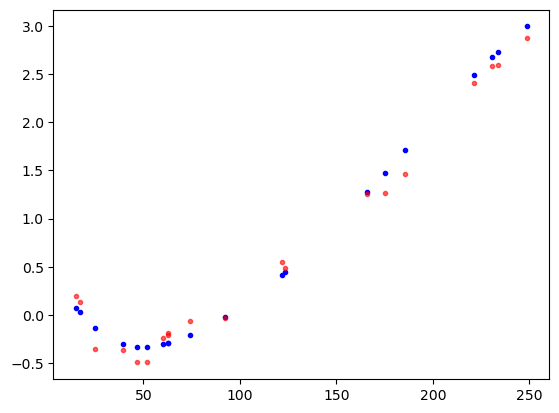

In [11]:
PrettyPlot(model, x_test, y_test)

7/7 [==============================] - 0s 608us/step


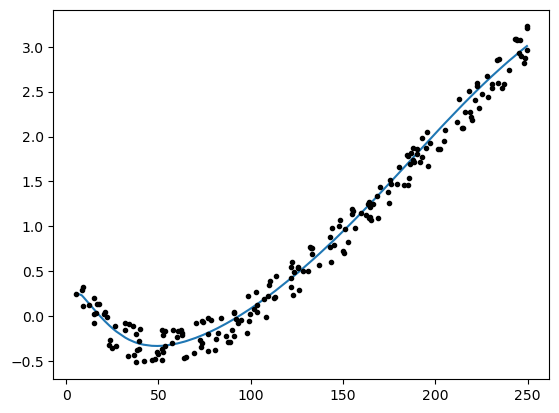

In [12]:
#PrettyPlot(model, x, y)
plt.plot(x, model.predict(x))
plt.plot(x,y,'k',marker = '.', linestyle = '')

Мы создали модель, аппроксимирующую данные. Теперь надо написать нейронку, предсказывающую значение функции, следующее после 10 первых значений.

In [13]:
data = model.predict(x)# creating a list of parameters
data = np.array(data, dtype = 'float')
data = data.reshape(len(data))
#data = np.sort(data,0)

#print(data)

7/7 [==============================] - 0s 629us/step


In [14]:
Input = []
temp = []

for i in range(0, len(data)-10):
    for j in range(i, i+10):
        temp.append(data[j])
    Input.append(temp)
    temp = []
Input = np.array(Input)
print(Input)
df = pd.DataFrame(Input)
df.dropna()

[[ 0.25620282  0.23253381  0.21978456 ...  0.07362154  0.05157416
   0.03157426]
 [ 0.23253381  0.21978456  0.21192658 ...  0.05157416  0.03157426
   0.00860703]
 [ 0.21978456  0.21192658  0.13869555 ...  0.03157426  0.00860703
  -0.05130997]
 ...
 [ 2.79156613  2.84059238  2.90459323 ...  2.95324993  2.97826743
   2.99258709]
 [ 2.84059238  2.90459323  2.91189265 ...  2.97826743  2.99258709
   3.00713086]
 [ 2.90459323  2.91189265  2.91850233 ...  2.99258709  3.00713086
   3.00739551]]


,0,1,2,3,4,5,6,7,8,9
0,0.256203,0.232534,0.219785,0.211927,0.138696,0.080644,0.075381,0.073622,0.051574,0.031574
1,0.232534,0.219785,0.211927,0.138696,0.080644,0.075381,0.073622,0.051574,0.031574,0.008607
2,0.219785,0.211927,0.138696,0.080644,0.075381,0.073622,0.051574,0.031574,0.008607,-0.051310
3,0.211927,0.138696,0.080644,0.075381,0.073622,0.051574,0.031574,0.008607,-0.051310,-0.056463
4,0.138696,0.080644,0.075381,0.073622,0.051574,0.031574,0.008607,-0.051310,-0.056463,-0.083945
...,...,...,...,...,...,...,...,...,...,...
185,2.745867,2.778319,2.791566,2.840592,2.904593,2.911893,2.918502,2.937327,2.943389,2.953250
186,2.778319,2.791566,2.840592,2.904593,2.911893,2.918502,2.937327,2.943389,2.953250,2.978267
187,2.791566,2.840592,2.904593,2.911893,2.918502,2.937327,2.943389,2.953250,2.978267,2.992587
188,2.840592,2.904593,2.911893,2.918502,2.937327,2.943389,2.953250,2.978267,2.992587,3.007131


In [15]:
Out = []
for i in range(10,len(data)):
    Out.append(data[i])

Out = np.array(Out)
Out.shape = (len(Out), 1)
Out.view()

df_1 = pd.DataFrame(Out)
df_1.dropna()

,0
0,0.008607
1,-0.051310
2,-0.056463
3,-0.083945
4,-0.099049
...,...
185,2.978267
186,2.992587
187,3.007131
188,3.007396


In [16]:
modelPredict = tf.keras.Sequential()

modelPredict.add(tf.keras.layers.Dense(100, activation='relu', input_dim = 10))
modelPredict.add(tf.keras.layers.Dense(100, activation='sigmoid'))
modelPredict.add(tf.keras.layers.Dense(100, activation='relu'))
modelPredict.add(tf.keras.layers.Dense(1))

modelPredict.compile(loss = 'mse',
                    optimizer = 'SGD',
                    metrics = 'mape')

modelPredict.fit(Input, Out, batch_size = 10, epochs=2000)

Epoch 1/2000
19/19 [==============================] - 0s 671us/step - loss: 0.8689 - mape: 294.3824
Epoch 2/2000
19/19 [==============================] - 0s 679us/step - loss: 0.1808 - mape: 234.9238
Epoch 3/2000
19/19 [==============================] - 0s 696us/step - loss: 0.0343 - mape: 57.2636
Epoch 4/2000
19/19 [==============================] - 0s 640us/step - loss: 0.0125 - mape: 62.5019
Epoch 5/2000
19/19 [==============================] - 0s 628us/step - loss: 0.0094 - mape: 55.4181
Epoch 6/2000
19/19 [==============================] - 0s 633us/step - loss: 0.0093 - mape: 58.6392
Epoch 7/2000
19/19 [==============================] - 0s 646us/step - loss: 0.0085 - mape: 58.5895
Epoch 8/2000
19/19 [==============================] - 0s 619us/step - loss: 0.0090 - mape: 58.9256
Epoch 9/2000
19/19 [==============================] - 0s 614us/step - loss: 0.0084 - mape: 58.8614
Epoch 10/2000
19/19 [==============================] - 0s 591us/step - loss: 0.0085 - mape: 54.0441
Epoch 1

Epoch 83/2000
19/19 [==============================] - 0s 601us/step - loss: 0.0044 - mape: 47.3895
Epoch 84/2000
19/19 [==============================] - 0s 606us/step - loss: 0.0046 - mape: 45.9629
Epoch 85/2000
19/19 [==============================] - 0s 613us/step - loss: 0.0049 - mape: 44.2060
Epoch 86/2000
19/19 [==============================] - 0s 616us/step - loss: 0.0043 - mape: 44.9966
Epoch 87/2000
19/19 [==============================] - 0s 590us/step - loss: 0.0042 - mape: 42.3957
Epoch 88/2000
19/19 [==============================] - 0s 590us/step - loss: 0.0045 - mape: 42.4625
Epoch 89/2000
19/19 [==============================] - 0s 637us/step - loss: 0.0044 - mape: 44.4670
Epoch 90/2000
19/19 [==============================] - 0s 724us/step - loss: 0.0040 - mape: 46.2132
Epoch 91/2000
19/19 [==============================] - 0s 642us/step - loss: 0.0045 - mape: 44.7562
Epoch 92/2000
19/19 [==============================] - 0s 633us/step - loss: 0.0047 - mape: 45.8691


19/19 [==============================] - 0s 618us/step - loss: 0.0031 - mape: 35.9819
Epoch 165/2000
19/19 [==============================] - 0s 654us/step - loss: 0.0029 - mape: 34.8712
Epoch 166/2000
19/19 [==============================] - 0s 718us/step - loss: 0.0030 - mape: 37.6210
Epoch 167/2000
19/19 [==============================] - 0s 764us/step - loss: 0.0030 - mape: 33.9287
Epoch 168/2000
19/19 [==============================] - 0s 590us/step - loss: 0.0031 - mape: 39.1428
Epoch 169/2000
19/19 [==============================] - 0s 662us/step - loss: 0.0030 - mape: 39.9072
Epoch 170/2000
19/19 [==============================] - 0s 640us/step - loss: 0.0033 - mape: 38.3243
Epoch 171/2000
19/19 [==============================] - 0s 667us/step - loss: 0.0032 - mape: 35.4016
Epoch 172/2000
19/19 [==============================] - 0s 671us/step - loss: 0.0030 - mape: 38.0719
Epoch 173/2000
19/19 [==============================] - 0s 640us/step - loss: 0.0031 - mape: 40.3917
Epoch

19/19 [==============================] - 0s 609us/step - loss: 0.0023 - mape: 27.7041
Epoch 246/2000
19/19 [==============================] - 0s 623us/step - loss: 0.0024 - mape: 30.7052
Epoch 247/2000
19/19 [==============================] - 0s 612us/step - loss: 0.0024 - mape: 29.9769
Epoch 248/2000
19/19 [==============================] - 0s 615us/step - loss: 0.0023 - mape: 29.7322
Epoch 249/2000
19/19 [==============================] - 0s 648us/step - loss: 0.0022 - mape: 30.8084
Epoch 250/2000
19/19 [==============================] - 0s 625us/step - loss: 0.0029 - mape: 31.6217
Epoch 251/2000
19/19 [==============================] - 0s 617us/step - loss: 0.0026 - mape: 27.4242
Epoch 252/2000
19/19 [==============================] - 0s 593us/step - loss: 0.0024 - mape: 28.8596
Epoch 253/2000
19/19 [==============================] - 0s 613us/step - loss: 0.0023 - mape: 30.7718
Epoch 254/2000
19/19 [==============================] - 0s 642us/step - loss: 0.0024 - mape: 29.3403
Epoch

19/19 [==============================] - 0s 623us/step - loss: 0.0019 - mape: 24.2283
Epoch 327/2000
19/19 [==============================] - 0s 617us/step - loss: 0.0019 - mape: 23.7191
Epoch 328/2000
19/19 [==============================] - 0s 611us/step - loss: 0.0019 - mape: 22.2644
Epoch 329/2000
19/19 [==============================] - 0s 637us/step - loss: 0.0019 - mape: 26.2041
Epoch 330/2000
19/19 [==============================] - 0s 625us/step - loss: 0.0018 - mape: 24.1828
Epoch 331/2000
19/19 [==============================] - 0s 629us/step - loss: 0.0021 - mape: 26.8327
Epoch 332/2000
19/19 [==============================] - 0s 614us/step - loss: 0.0019 - mape: 22.3827
Epoch 333/2000
19/19 [==============================] - 0s 590us/step - loss: 0.0021 - mape: 27.8577
Epoch 334/2000
19/19 [==============================] - 0s 630us/step - loss: 0.0018 - mape: 24.1475
Epoch 335/2000
19/19 [==============================] - 0s 623us/step - loss: 0.0020 - mape: 21.8116
Epoch

19/19 [==============================] - 0s 605us/step - loss: 0.0017 - mape: 17.3091
Epoch 408/2000
19/19 [==============================] - 0s 596us/step - loss: 0.0015 - mape: 20.8085
Epoch 409/2000
19/19 [==============================] - 0s 618us/step - loss: 0.0016 - mape: 20.0248
Epoch 410/2000
19/19 [==============================] - 0s 588us/step - loss: 0.0016 - mape: 21.6107
Epoch 411/2000
19/19 [==============================] - 0s 605us/step - loss: 0.0016 - mape: 18.4248
Epoch 412/2000
19/19 [==============================] - 0s 635us/step - loss: 0.0016 - mape: 21.4008
Epoch 413/2000
19/19 [==============================] - 0s 638us/step - loss: 0.0015 - mape: 20.6178
Epoch 414/2000
19/19 [==============================] - 0s 634us/step - loss: 0.0015 - mape: 19.9349
Epoch 415/2000
19/19 [==============================] - 0s 615us/step - loss: 0.0016 - mape: 17.7322
Epoch 416/2000
19/19 [==============================] - 0s 591us/step - loss: 0.0015 - mape: 21.6715
Epoch

19/19 [==============================] - 0s 581us/step - loss: 0.0015 - mape: 15.3590
Epoch 489/2000
19/19 [==============================] - 0s 630us/step - loss: 0.0013 - mape: 16.4514
Epoch 490/2000
19/19 [==============================] - 0s 640us/step - loss: 0.0013 - mape: 15.9397
Epoch 491/2000
19/19 [==============================] - 0s 645us/step - loss: 0.0014 - mape: 17.2204
Epoch 492/2000
19/19 [==============================] - 0s 628us/step - loss: 0.0013 - mape: 15.7007
Epoch 493/2000
19/19 [==============================] - 0s 619us/step - loss: 0.0012 - mape: 17.7011
Epoch 494/2000
19/19 [==============================] - 0s 598us/step - loss: 0.0014 - mape: 16.6312
Epoch 495/2000
19/19 [==============================] - 0s 599us/step - loss: 0.0014 - mape: 17.1932
Epoch 496/2000
19/19 [==============================] - 0s 634us/step - loss: 0.0014 - mape: 17.7842
Epoch 497/2000
19/19 [==============================] - 0s 621us/step - loss: 0.0013 - mape: 16.0262
Epoch

19/19 [==============================] - 0s 713us/step - loss: 0.0012 - mape: 12.7866
Epoch 570/2000
19/19 [==============================] - 0s 784us/step - loss: 0.0012 - mape: 13.4398
Epoch 571/2000
19/19 [==============================] - 0s 716us/step - loss: 0.0013 - mape: 15.1564
Epoch 572/2000
19/19 [==============================] - 0s 731us/step - loss: 0.0014 - mape: 14.3415
Epoch 573/2000
19/19 [==============================] - 0s 748us/step - loss: 0.0013 - mape: 11.3573
Epoch 574/2000
19/19 [==============================] - 0s 724us/step - loss: 0.0011 - mape: 12.5376
Epoch 575/2000
19/19 [==============================] - 0s 738us/step - loss: 0.0014 - mape: 13.9317
Epoch 576/2000
19/19 [==============================] - 0s 709us/step - loss: 0.0012 - mape: 12.6906
Epoch 577/2000
19/19 [==============================] - 0s 743us/step - loss: 0.0012 - mape: 12.5632
Epoch 578/2000
19/19 [==============================] - 0s 708us/step - loss: 0.0011 - mape: 12.5708
Epoch

19/19 [==============================] - 0s 613us/step - loss: 0.0010 - mape: 10.3964
Epoch 651/2000
19/19 [==============================] - 0s 576us/step - loss: 0.0010 - mape: 9.4939
Epoch 652/2000
19/19 [==============================] - 0s 579us/step - loss: 0.0011 - mape: 12.8897
Epoch 653/2000
19/19 [==============================] - 0s 617us/step - loss: 0.0011 - mape: 12.1041
Epoch 654/2000
19/19 [==============================] - 0s 606us/step - loss: 0.0011 - mape: 10.8333
Epoch 655/2000
19/19 [==============================] - 0s 641us/step - loss: 0.0011 - mape: 11.3283
Epoch 656/2000
19/19 [==============================] - 0s 630us/step - loss: 9.7210e-04 - mape: 10.5428
Epoch 657/2000
19/19 [==============================] - 0s 614us/step - loss: 0.0011 - mape: 12.4299
Epoch 658/2000
19/19 [==============================] - 0s 592us/step - loss: 0.0012 - mape: 11.3405
Epoch 659/2000
19/19 [==============================] - 0s 586us/step - loss: 9.5668e-04 - mape: 8.2101

19/19 [==============================] - 0s 597us/step - loss: 0.0011 - mape: 9.3950
Epoch 731/2000
19/19 [==============================] - 0s 613us/step - loss: 9.3221e-04 - mape: 8.1113
Epoch 732/2000
19/19 [==============================] - 0s 609us/step - loss: 9.9934e-04 - mape: 8.5552
Epoch 733/2000
19/19 [==============================] - 0s 629us/step - loss: 9.3368e-04 - mape: 8.6931
Epoch 734/2000
19/19 [==============================] - 0s 625us/step - loss: 9.2586e-04 - mape: 11.1725
Epoch 735/2000
19/19 [==============================] - 0s 638us/step - loss: 9.0124e-04 - mape: 9.1226
Epoch 736/2000
19/19 [==============================] - 0s 602us/step - loss: 0.0011 - mape: 10.2962
Epoch 737/2000
19/19 [==============================] - 0s 609us/step - loss: 0.0010 - mape: 9.6147
Epoch 738/2000
19/19 [==============================] - 0s 638us/step - loss: 9.3107e-04 - mape: 9.0521
Epoch 739/2000
19/19 [==============================] - 0s 609us/step - loss: 9.7275e-04 

Epoch 810/2000
19/19 [==============================] - 0s 590us/step - loss: 9.0295e-04 - mape: 9.4924
Epoch 811/2000
19/19 [==============================] - 0s 583us/step - loss: 8.9106e-04 - mape: 8.9114
Epoch 812/2000
19/19 [==============================] - 0s 618us/step - loss: 9.5257e-04 - mape: 8.8081
Epoch 813/2000
19/19 [==============================] - 0s 658us/step - loss: 8.2438e-04 - mape: 9.4911
Epoch 814/2000
19/19 [==============================] - 0s 624us/step - loss: 8.7718e-04 - mape: 8.0493
Epoch 815/2000
19/19 [==============================] - 0s 614us/step - loss: 0.0010 - mape: 12.6839
Epoch 816/2000
19/19 [==============================] - 0s 606us/step - loss: 8.7987e-04 - mape: 9.3875
Epoch 817/2000
19/19 [==============================] - 0s 581us/step - loss: 0.0010 - mape: 11.1439
Epoch 818/2000
19/19 [==============================] - 0s 624us/step - loss: 8.8417e-04 - mape: 9.2277
Epoch 819/2000
19/19 [==============================] - 0s 620us/step 

19/19 [==============================] - 0s 612us/step - loss: 9.2764e-04 - mape: 8.6394
Epoch 890/2000
19/19 [==============================] - 0s 582us/step - loss: 8.1328e-04 - mape: 7.7750
Epoch 891/2000
19/19 [==============================] - 0s 608us/step - loss: 8.7765e-04 - mape: 8.4307
Epoch 892/2000
19/19 [==============================] - 0s 613us/step - loss: 0.0011 - mape: 7.7332
Epoch 893/2000
19/19 [==============================] - 0s 636us/step - loss: 9.0164e-04 - mape: 8.9678
Epoch 894/2000
19/19 [==============================] - 0s 628us/step - loss: 8.8931e-04 - mape: 10.6186
Epoch 895/2000
19/19 [==============================] - 0s 602us/step - loss: 9.2180e-04 - mape: 8.5809
Epoch 896/2000
19/19 [==============================] - 0s 596us/step - loss: 0.0010 - mape: 8.3740
Epoch 897/2000
19/19 [==============================] - 0s 588us/step - loss: 9.1253e-04 - mape: 11.5454
Epoch 898/2000
19/19 [==============================] - 0s 635us/step - loss: 0.0010 

19/19 [==============================] - 0s 567us/step - loss: 9.7992e-04 - mape: 9.0807
Epoch 969/2000
19/19 [==============================] - 0s 580us/step - loss: 8.3207e-04 - mape: 8.2063
Epoch 970/2000
19/19 [==============================] - 0s 587us/step - loss: 8.2020e-04 - mape: 7.5622
Epoch 971/2000
19/19 [==============================] - 0s 651us/step - loss: 8.9781e-04 - mape: 11.4235
Epoch 972/2000
19/19 [==============================] - 0s 608us/step - loss: 8.8447e-04 - mape: 9.4003
Epoch 973/2000
19/19 [==============================] - 0s 612us/step - loss: 9.1532e-04 - mape: 7.9802
Epoch 974/2000
19/19 [==============================] - 0s 642us/step - loss: 9.2168e-04 - mape: 9.0471
Epoch 975/2000
19/19 [==============================] - 0s 623us/step - loss: 8.8854e-04 - mape: 9.6765
Epoch 976/2000
19/19 [==============================] - 0s 647us/step - loss: 0.0011 - mape: 9.1328
Epoch 977/2000
19/19 [==============================] - 0s 614us/step - loss: 8.92

19/19 [==============================] - 0s 686us/step - loss: 8.2923e-04 - mape: 7.6494
Epoch 1047/2000
19/19 [==============================] - 0s 596us/step - loss: 8.1638e-04 - mape: 8.6803
Epoch 1048/2000
19/19 [==============================] - 0s 668us/step - loss: 7.6747e-04 - mape: 7.5837
Epoch 1049/2000
19/19 [==============================] - 0s 641us/step - loss: 8.1799e-04 - mape: 7.8681
Epoch 1050/2000
19/19 [==============================] - 0s 728us/step - loss: 0.0011 - mape: 10.3869
Epoch 1051/2000
19/19 [==============================] - 0s 720us/step - loss: 0.0011 - mape: 8.9400
Epoch 1052/2000
19/19 [==============================] - 0s 654us/step - loss: 8.0467e-04 - mape: 8.1846
Epoch 1053/2000
19/19 [==============================] - 0s 606us/step - loss: 9.0783e-04 - mape: 8.0776
Epoch 1054/2000
19/19 [==============================] - 0s 629us/step - loss: 7.8979e-04 - mape: 7.9026
Epoch 1055/2000
19/19 [==============================] - 0s 669us/step - loss:

19/19 [==============================] - 0s 634us/step - loss: 8.9178e-04 - mape: 10.0317
Epoch 1125/2000
19/19 [==============================] - 0s 590us/step - loss: 7.9101e-04 - mape: 7.2318
Epoch 1126/2000
19/19 [==============================] - 0s 587us/step - loss: 8.0707e-04 - mape: 6.3826
Epoch 1127/2000
19/19 [==============================] - 0s 645us/step - loss: 8.7646e-04 - mape: 6.7815
Epoch 1128/2000
19/19 [==============================] - 0s 643us/step - loss: 9.3843e-04 - mape: 10.3575
Epoch 1129/2000
19/19 [==============================] - 0s 600us/step - loss: 7.4539e-04 - mape: 7.2735
Epoch 1130/2000
19/19 [==============================] - 0s 627us/step - loss: 9.4346e-04 - mape: 9.2988
Epoch 1131/2000
19/19 [==============================] - 0s 644us/step - loss: 8.4742e-04 - mape: 7.4737
Epoch 1132/2000
19/19 [==============================] - 0s 625us/step - loss: 8.3933e-04 - mape: 8.5125
Epoch 1133/2000
19/19 [==============================] - 0s 623us/ste

19/19 [==============================] - 0s 604us/step - loss: 8.0554e-04 - mape: 10.4485
Epoch 1203/2000
19/19 [==============================] - 0s 591us/step - loss: 8.3736e-04 - mape: 8.4839
Epoch 1204/2000
19/19 [==============================] - 0s 595us/step - loss: 9.3667e-04 - mape: 9.0479
Epoch 1205/2000
19/19 [==============================] - 0s 609us/step - loss: 8.5779e-04 - mape: 10.6035
Epoch 1206/2000
19/19 [==============================] - 0s 635us/step - loss: 8.6611e-04 - mape: 8.4737
Epoch 1207/2000
19/19 [==============================] - 0s 628us/step - loss: 9.1428e-04 - mape: 9.9588
Epoch 1208/2000
19/19 [==============================] - 0s 612us/step - loss: 8.8797e-04 - mape: 7.6844
Epoch 1209/2000
19/19 [==============================] - 0s 587us/step - loss: 8.6386e-04 - mape: 8.0739
Epoch 1210/2000
19/19 [==============================] - 0s 596us/step - loss: 9.1035e-04 - mape: 10.4472
Epoch 1211/2000
19/19 [==============================] - 0s 632us/st

19/19 [==============================] - 0s 630us/step - loss: 7.9427e-04 - mape: 9.0449
Epoch 1281/2000
19/19 [==============================] - 0s 611us/step - loss: 7.7776e-04 - mape: 8.9259
Epoch 1282/2000
19/19 [==============================] - 0s 609us/step - loss: 7.6459e-04 - mape: 7.6688
Epoch 1283/2000
19/19 [==============================] - 0s 621us/step - loss: 9.8229e-04 - mape: 10.8897
Epoch 1284/2000
19/19 [==============================] - 0s 598us/step - loss: 7.5318e-04 - mape: 7.7771
Epoch 1285/2000
19/19 [==============================] - 0s 595us/step - loss: 7.9832e-04 - mape: 9.3971
Epoch 1286/2000
19/19 [==============================] - 0s 645us/step - loss: 0.0010 - mape: 11.0798
Epoch 1287/2000
19/19 [==============================] - 0s 615us/step - loss: 7.4753e-04 - mape: 7.2899
Epoch 1288/2000
19/19 [==============================] - 0s 617us/step - loss: 8.6733e-04 - mape: 8.5511
Epoch 1289/2000
19/19 [==============================] - 0s 599us/step - 

19/19 [==============================] - 0s 615us/step - loss: 7.7963e-04 - mape: 7.8879
Epoch 1359/2000
19/19 [==============================] - 0s 609us/step - loss: 7.5331e-04 - mape: 7.5605
Epoch 1360/2000
19/19 [==============================] - 0s 586us/step - loss: 8.8552e-04 - mape: 12.7090
Epoch 1361/2000
19/19 [==============================] - 0s 641us/step - loss: 8.3287e-04 - mape: 10.4438
Epoch 1362/2000
19/19 [==============================] - 0s 631us/step - loss: 8.2588e-04 - mape: 9.7552
Epoch 1363/2000
19/19 [==============================] - 0s 603us/step - loss: 8.2136e-04 - mape: 6.8950
Epoch 1364/2000
19/19 [==============================] - 0s 594us/step - loss: 8.0546e-04 - mape: 6.9036
Epoch 1365/2000
19/19 [==============================] - 0s 636us/step - loss: 7.6366e-04 - mape: 8.1264
Epoch 1366/2000
19/19 [==============================] - 0s 636us/step - loss: 7.9249e-04 - mape: 8.3129
Epoch 1367/2000
19/19 [==============================] - 0s 634us/ste

19/19 [==============================] - 0s 562us/step - loss: 6.7658e-04 - mape: 6.9314
Epoch 1437/2000
19/19 [==============================] - 0s 631us/step - loss: 8.0403e-04 - mape: 8.2140
Epoch 1438/2000
19/19 [==============================] - 0s 598us/step - loss: 7.6688e-04 - mape: 7.8210
Epoch 1439/2000
19/19 [==============================] - 0s 618us/step - loss: 7.5170e-04 - mape: 8.3122
Epoch 1440/2000
19/19 [==============================] - 0s 633us/step - loss: 7.6865e-04 - mape: 7.3437
Epoch 1441/2000
19/19 [==============================] - 0s 629us/step - loss: 7.3290e-04 - mape: 7.9797
Epoch 1442/2000
19/19 [==============================] - 0s 632us/step - loss: 7.4597e-04 - mape: 9.1315
Epoch 1443/2000
19/19 [==============================] - 0s 579us/step - loss: 7.2773e-04 - mape: 10.1295
Epoch 1444/2000
19/19 [==============================] - 0s 610us/step - loss: 8.1530e-04 - mape: 9.3373
Epoch 1445/2000
19/19 [==============================] - 0s 630us/step

19/19 [==============================] - 0s 590us/step - loss: 7.6841e-04 - mape: 7.4019
Epoch 1515/2000
19/19 [==============================] - 0s 600us/step - loss: 9.5459e-04 - mape: 10.7329
Epoch 1516/2000
19/19 [==============================] - 0s 644us/step - loss: 8.2590e-04 - mape: 6.8099
Epoch 1517/2000
19/19 [==============================] - 0s 652us/step - loss: 7.3146e-04 - mape: 7.6172
Epoch 1518/2000
19/19 [==============================] - 0s 590us/step - loss: 8.2967e-04 - mape: 9.8459
Epoch 1519/2000
19/19 [==============================] - 0s 623us/step - loss: 7.8351e-04 - mape: 9.0325
Epoch 1520/2000
19/19 [==============================] - 0s 637us/step - loss: 7.3993e-04 - mape: 8.1722
Epoch 1521/2000
19/19 [==============================] - 0s 626us/step - loss: 7.2442e-04 - mape: 8.2609
Epoch 1522/2000
19/19 [==============================] - 0s 635us/step - loss: 7.3317e-04 - mape: 9.5319
Epoch 1523/2000
19/19 [==============================] - 0s 584us/step

19/19 [==============================] - 0s 612us/step - loss: 7.4966e-04 - mape: 8.0831
Epoch 1593/2000
19/19 [==============================] - 0s 610us/step - loss: 7.6010e-04 - mape: 9.3432
Epoch 1594/2000
19/19 [==============================] - 0s 626us/step - loss: 8.1058e-04 - mape: 8.1439
Epoch 1595/2000
19/19 [==============================] - 0s 614us/step - loss: 7.9245e-04 - mape: 11.7698
Epoch 1596/2000
19/19 [==============================] - 0s 600us/step - loss: 8.5640e-04 - mape: 10.1563
Epoch 1597/2000
19/19 [==============================] - 0s 595us/step - loss: 8.1637e-04 - mape: 10.4509
Epoch 1598/2000
19/19 [==============================] - 0s 628us/step - loss: 6.7537e-04 - mape: 8.1837
Epoch 1599/2000
19/19 [==============================] - 0s 617us/step - loss: 7.5202e-04 - mape: 8.7651
Epoch 1600/2000
19/19 [==============================] - 0s 616us/step - loss: 7.1219e-04 - mape: 8.2309
Epoch 1601/2000
19/19 [==============================] - 0s 609us/st

Epoch 1670/2000
19/19 [==============================] - 0s 644us/step - loss: 7.1942e-04 - mape: 7.8987
Epoch 1671/2000
19/19 [==============================] - 0s 658us/step - loss: 7.7013e-04 - mape: 9.6020
Epoch 1672/2000
19/19 [==============================] - 0s 688us/step - loss: 7.8197e-04 - mape: 7.5179
Epoch 1673/2000
19/19 [==============================] - 0s 662us/step - loss: 7.5594e-04 - mape: 7.6211
Epoch 1674/2000
19/19 [==============================] - 0s 668us/step - loss: 8.6065e-04 - mape: 10.8260
Epoch 1675/2000
19/19 [==============================] - 0s 633us/step - loss: 7.1971e-04 - mape: 8.1051
Epoch 1676/2000
19/19 [==============================] - 0s 653us/step - loss: 7.4654e-04 - mape: 9.6972
Epoch 1677/2000
19/19 [==============================] - 0s 633us/step - loss: 7.2430e-04 - mape: 8.7266
Epoch 1678/2000
19/19 [==============================] - 0s 683us/step - loss: 7.5773e-04 - mape: 9.9931
Epoch 1679/2000
19/19 [==============================]

19/19 [==============================] - 0s 773us/step - loss: 6.7850e-04 - mape: 7.9656
Epoch 1748/2000
19/19 [==============================] - 0s 710us/step - loss: 7.3542e-04 - mape: 8.0689
Epoch 1749/2000
19/19 [==============================] - 0s 933us/step - loss: 7.0011e-04 - mape: 9.3591
Epoch 1750/2000
19/19 [==============================] - 0s 830us/step - loss: 9.7690e-04 - mape: 8.9179
Epoch 1751/2000
19/19 [==============================] - 0s 813us/step - loss: 6.8401e-04 - mape: 9.4280
Epoch 1752/2000
19/19 [==============================] - 0s 823us/step - loss: 7.6352e-04 - mape: 8.7835
Epoch 1753/2000
19/19 [==============================] - 0s 776us/step - loss: 7.4987e-04 - mape: 7.8467
Epoch 1754/2000
19/19 [==============================] - 0s 838us/step - loss: 8.0821e-04 - mape: 8.8396
Epoch 1755/2000
19/19 [==============================] - 0s 929us/step - loss: 8.5865e-04 - mape: 10.7398
Epoch 1756/2000
19/19 [==============================] - 0s 749us/step

19/19 [==============================] - 0s 734us/step - loss: 7.3324e-04 - mape: 8.4569
Epoch 1826/2000
19/19 [==============================] - 0s 734us/step - loss: 6.7348e-04 - mape: 9.4031
Epoch 1827/2000
19/19 [==============================] - 0s 784us/step - loss: 7.5302e-04 - mape: 7.1412
Epoch 1828/2000
19/19 [==============================] - 0s 744us/step - loss: 8.0435e-04 - mape: 9.5827
Epoch 1829/2000
19/19 [==============================] - 0s 723us/step - loss: 6.8440e-04 - mape: 6.6888
Epoch 1830/2000
19/19 [==============================] - 0s 699us/step - loss: 7.7976e-04 - mape: 7.3590
Epoch 1831/2000
19/19 [==============================] - 0s 694us/step - loss: 6.5675e-04 - mape: 7.9901
Epoch 1832/2000
19/19 [==============================] - 0s 598us/step - loss: 7.7077e-04 - mape: 8.1876
Epoch 1833/2000
19/19 [==============================] - 0s 604us/step - loss: 7.4349e-04 - mape: 10.5789
Epoch 1834/2000
19/19 [==============================] - 0s 810us/step

19/19 [==============================] - 0s 690us/step - loss: 6.6596e-04 - mape: 8.2379
Epoch 1904/2000
19/19 [==============================] - 0s 674us/step - loss: 7.6030e-04 - mape: 7.4521
Epoch 1905/2000
19/19 [==============================] - 0s 638us/step - loss: 7.9456e-04 - mape: 9.7957
Epoch 1906/2000
19/19 [==============================] - 0s 616us/step - loss: 7.4248e-04 - mape: 9.5547
Epoch 1907/2000
19/19 [==============================] - 0s 630us/step - loss: 7.0343e-04 - mape: 8.7464
Epoch 1908/2000
19/19 [==============================] - 0s 706us/step - loss: 7.4020e-04 - mape: 9.5718
Epoch 1909/2000
19/19 [==============================] - 0s 631us/step - loss: 7.0327e-04 - mape: 7.3915
Epoch 1910/2000
19/19 [==============================] - 0s 613us/step - loss: 7.3271e-04 - mape: 7.3625
Epoch 1911/2000
19/19 [==============================] - 0s 605us/step - loss: 7.0902e-04 - mape: 7.8118
Epoch 1912/2000
19/19 [==============================] - 0s 638us/step 

19/19 [==============================] - 0s 606us/step - loss: 6.7438e-04 - mape: 10.2337
Epoch 1982/2000
19/19 [==============================] - 0s 608us/step - loss: 7.1283e-04 - mape: 8.7499
Epoch 1983/2000
19/19 [==============================] - 0s 591us/step - loss: 7.6367e-04 - mape: 6.3758
Epoch 1984/2000
19/19 [==============================] - 0s 596us/step - loss: 8.2295e-04 - mape: 8.3272
Epoch 1985/2000
19/19 [==============================] - 0s 610us/step - loss: 6.7912e-04 - mape: 10.7368
Epoch 1986/2000
19/19 [==============================] - 0s 599us/step - loss: 7.1735e-04 - mape: 7.0041
Epoch 1987/2000
19/19 [==============================] - 0s 611us/step - loss: 6.6591e-04 - mape: 7.6708
Epoch 1988/2000
19/19 [==============================] - 0s 605us/step - loss: 7.9491e-04 - mape: 8.8718
Epoch 1989/2000
19/19 [==============================] - 0s 587us/step - loss: 7.3980e-04 - mape: 10.3383
Epoch 1990/2000
19/19 [==============================] - 0s 590us/st

In [17]:
predicts = modelPredict.predict(Input)

6/6 [==============================] - 0s 699us/step


In [18]:
X_1 = [x[i] for i in range(10, len(x))]
print(X_1)

[17.930867093594813, 20.696084687351096, 20.94387642369773, 22.29887384753765, 23.07070185413432, 23.56325092687673, 24.83011729894469, 26.233822273215065, 27.145222573353305, 31.6899805804967, 32.1056526821928, 33.62487618240378, 34.07888119326092, 36.24419874831662, 36.8836849338957, 37.68509042496217, 37.935671485353936, 38.37486526260243, 39.36868251926977, 39.383633819166995, 39.75857035872739, 41.991370477452556, 46.39978628494572, 48.08981104878029, 49.35168579108776, 49.83849459916154, 51.81400389009926, 51.952463837906436, 52.01389912480611, 52.18432628564832, 52.32054946773254, 53.54123096077705, 53.73503650465179, 57.2949673117621, 57.97507857226833, 59.937816071647795, 60.330149429097254, 62.378865391041074, 62.528152728889374, 62.75048615959903, 63.95122795954988, 65.12996120116637, 69.49345395497355, 70.09018991744696, 72.69689815326585, 73.02976521307994, 73.58541148366683, 73.67641871538014, 74.09628176413587, 76.61254132967852, 76.62155561037603, 77.09064036180908, 78.

In [19]:
print(x)

[  5.32737155   8.39256893   8.97889397   9.32588954  12.39346884
  14.81243075  15.03483346  15.1093343   16.05019721  16.91697296
  17.93086709  20.69608469  20.94387642  22.29887385  23.07070185
  23.56325093  24.8301173   26.23382227  27.14522257  31.68998058
  32.10565268  33.62487618  34.07888119  36.24419875  36.88368493
  37.68509042  37.93567149  38.37486526  39.36868252  39.38363382
  39.75857036  41.99137048  46.39978628  48.08981105  49.35168579
  49.8384946   51.81400389  51.95246384  52.01389912  52.18432629
  52.32054947  53.54123096  53.7350365   57.29496731  57.97507857
  59.93781607  60.33014943  62.37886539  62.52815273  62.75048616
  63.95122796  65.1299612   69.49345395  70.09018992  72.69689815
  73.02976521  73.58541148  73.67641872  74.09628176  76.61254133
  76.62155561  77.09064036  78.55190011  80.70362636  81.04810391
  82.03685087  83.83642827  86.59445654  87.75826733  88.80646345
  89.98422372  90.71474307  90.90887375  90.97661515  92.01899679
  93.20362

7/7 [==============================] - 0s 570us/step


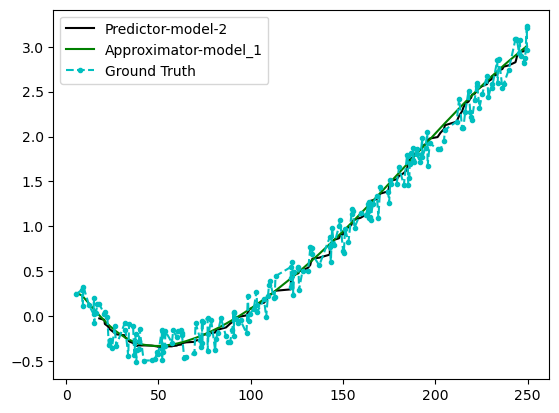

In [20]:
plt.plot(X_1, predicts,'k', label = 'Predictor-model-2')# Predictor
plt.plot(x,model.predict(x), 'g', label = 'Approximator-model_1')# Approximator
plt.plot(x,y,'c',marker = '.',linestyle = '--', label = "Ground Truth")
plt.legend()
plt.show()